Erste VErsuche

In [ ]:
import geopandas as gpd
import pandas as pd
import numpy as np

DATA_PATH = "../../../../data"
ANALYSES_PATH = DATA_PATH + "/analysis/worldcover"
PREPROCESSING_PATH = DATA_PATH + "/preprocessing/worldcover/2020"


# Arealstatistik-Daten laden
polygons = gpd.read_file(
    r"D:\Worldcover_test\data\analysis\worldcover\arealstatistik_mapped_2020.gpkg",
    driver="GPKG"
)

# Excel-Mappingtabelle laden
mapping_df = pd.read_excel(
    DATA_PATH + "/analysis/worldcover/Mapping_AS_WC_v2.xlsx"
)

# AS -> IPCC_WC_Id Mapping-Dict
as_to_ipcc = dict(zip(mapping_df["AS18_72"], mapping_df["IPCC_WC_Id"]))

# Vier Layer mit demselben Mapping abbilden
polygons["IPCC_AS_Id_18"] = polygons["AS18_72"].map(as_to_ipcc)
polygons["IPCC_AS_Id_09"] = polygons["AS09_72"].map(as_to_ipcc)
polygons["IPCC_AS_Id_97"] = polygons["AS97_72"].map(as_to_ipcc)
polygons["IPCC_AS_Id_85"] = polygons["AS85_72"].map(as_to_ipcc)

# NaN-Handling (optional, ist hier eigentlich redundant, map gibt schon NaN zurück)
polygons["IPCC_AS_Id_18"] = polygons["IPCC_AS_Id_18"].fillna(np.nan)
polygons["IPCC_AS_Id_09"] = polygons["IPCC_AS_Id_09"].fillna(np.nan)
polygons["IPCC_AS_Id_97"] = polygons["IPCC_AS_Id_97"].fillna(np.nan)
polygons["IPCC_AS_Id_85"] = polygons["IPCC_AS_Id_85"].fillna(np.nan)

# Ergebnis speichern
polygons.to_file(
   r"D:\Worldcover_test\data\analysis\worldcover\arealstatistik_Zeitvergleich_mapped.gpkg",
    driver="GPKG"
)


CSV

In [1]:
import geopandas as gpd
import pandas as pd


# Polygone laden
polygons = gpd.read_file(
    r"D:\Worldcover_test\data\analysis\worldcover\arealstatistik_Zeitvergleich_mapped.gpkg",
    driver="GPKG"
)

print("Verfügbare Spalten:", polygons.columns.tolist())

# Liste der Spalten + zugehörige Jahresangaben
as_cols = {
    "AS18_72": 2018,
    "AS09_72": 2009,
    "AS97_72": 1997,
    "AS85_72": 1985,
}

all_counts = []

for col, year in as_cols.items():
    print(f"\nVerarbeite {col}:")
    counts_series = polygons[col].value_counts(dropna=False)
    print("Erste 5 Werte:", counts_series.head())
    
    # Explizit umbenennen: index -> AS_72, values -> count
    counts = pd.DataFrame({
        "AS_72": counts_series.index,
        "count": counts_series.values
    })
    counts["year"] = year
    all_counts.append(counts)
    print(f"Shape: {counts.shape}")

counts_df = pd.concat(all_counts, ignore_index=True)
print("\ncounts_df Spalten nach concat:", counts_df.columns.tolist())
print("counts_df Vorschau:\n", counts_df.head())

# NaN-Kategorien entfernen
counts_df = counts_df[counts_df["AS_72"].notna()]

# Pivot-Tabelle
counts_pivot = counts_df.pivot_table(
    index="AS_72",
    columns="year",
    values="count",
    fill_value=0
).reset_index()

# CSV speichern
counts_pivot.to_csv(
    r"D:\Worldcover_test\data\analysis\worldcover\arealstatistik_Zeitvergleich.csv",
    index=False
)

print("\nCSV gespeichert!")
print("Vorschau Pivot:")
print(counts_pivot.head(10))
print(f"Shape: {counts_pivot.shape}")


c:\Users\alexa\anaconda3\envs\WC\lib\site-packages\pyogrio\raw.py:198: RuntimeWarning: driver GPKG does not support open option DRIVER
  return ogr_read(


Verfügbare Spalten: ['RELI', 'E_COORD', 'N_COORD', 'GMDE_ID', 'GMDE_HISTID', 'FJ85', 'FJ97', 'FJ09', 'FJ18', 'FJ25', 'METHOD25', 'REVISION25', 'AS85_72', 'AS97_72', 'AS09_72', 'AS18_72', 'AS25_72', 'AS85_27', 'AS97_27', 'AS09_27', 'AS18_27', 'AS25_27', 'AS85_17', 'AS97_17', 'AS09_17', 'AS18_17', 'AS25_17', 'AS85_4', 'AS97_4', 'AS09_4', 'AS18_4', 'AS25_4', 'LC85_27', 'LC97_27', 'LC09_27', 'LC18_27', 'LC25_27', 'LC85_6', 'LC97_6', 'LC09_6', 'LC18_6', 'LC25_6', 'LU85_46', 'LU97_46', 'LU09_46', 'LU18_46', 'LU25_46', 'LU85_10', 'LU97_10', 'LU09_10', 'LU18_10', 'LU25_10', 'LU85_4', 'LU97_4', 'LU09_4', 'LU18_4', 'LU25_4', 'WorldCover_2020_class_1', 'WorldCover_2020_class_1_Percent', 'WorldCover_2020_class_2', 'WorldCover_2020_class_2_Percent', 'WorldCover_2020_class_3', 'WorldCover_2020_class_3_Percent', 'IPCC_WC_Id', 'IPCC_AS_Id', 'IPCC_AS_Id_18', 'IPCC_AS_Id_09', 'IPCC_AS_Id_97', 'IPCC_AS_Id_85', 'geometry']

Verarbeite AS18_72:
Erste 5 Werte: AS18_72
50    953677
41    384393
42    340282


Vis- Versuche mit 72 Klassen

Shape: (72, 5)
Columns: ['AS_72', '1985', '1997', '2009', '2018']
   AS_72   1985   1997   2009   2018
0      1   6330   7909   8592   9293
1      2  11789  14111  15212  16245
2      3   8933  11197  13199  14686
3      4  41265  49803  57298  62016
4      5    555    890   1245   1414
NaN counts per year column:
1985    0
1997    0
2009    0
2018    0
dtype: int64
Heatmap data shape: (72, 4)
        1985   1997   2009   2018
AS_72                            
1       6330   7909   8592   9293
2      11789  14111  15212  16245
3       8933  11197  13199  14686
4      41265  49803  57298  62016
5        555    890   1245   1414


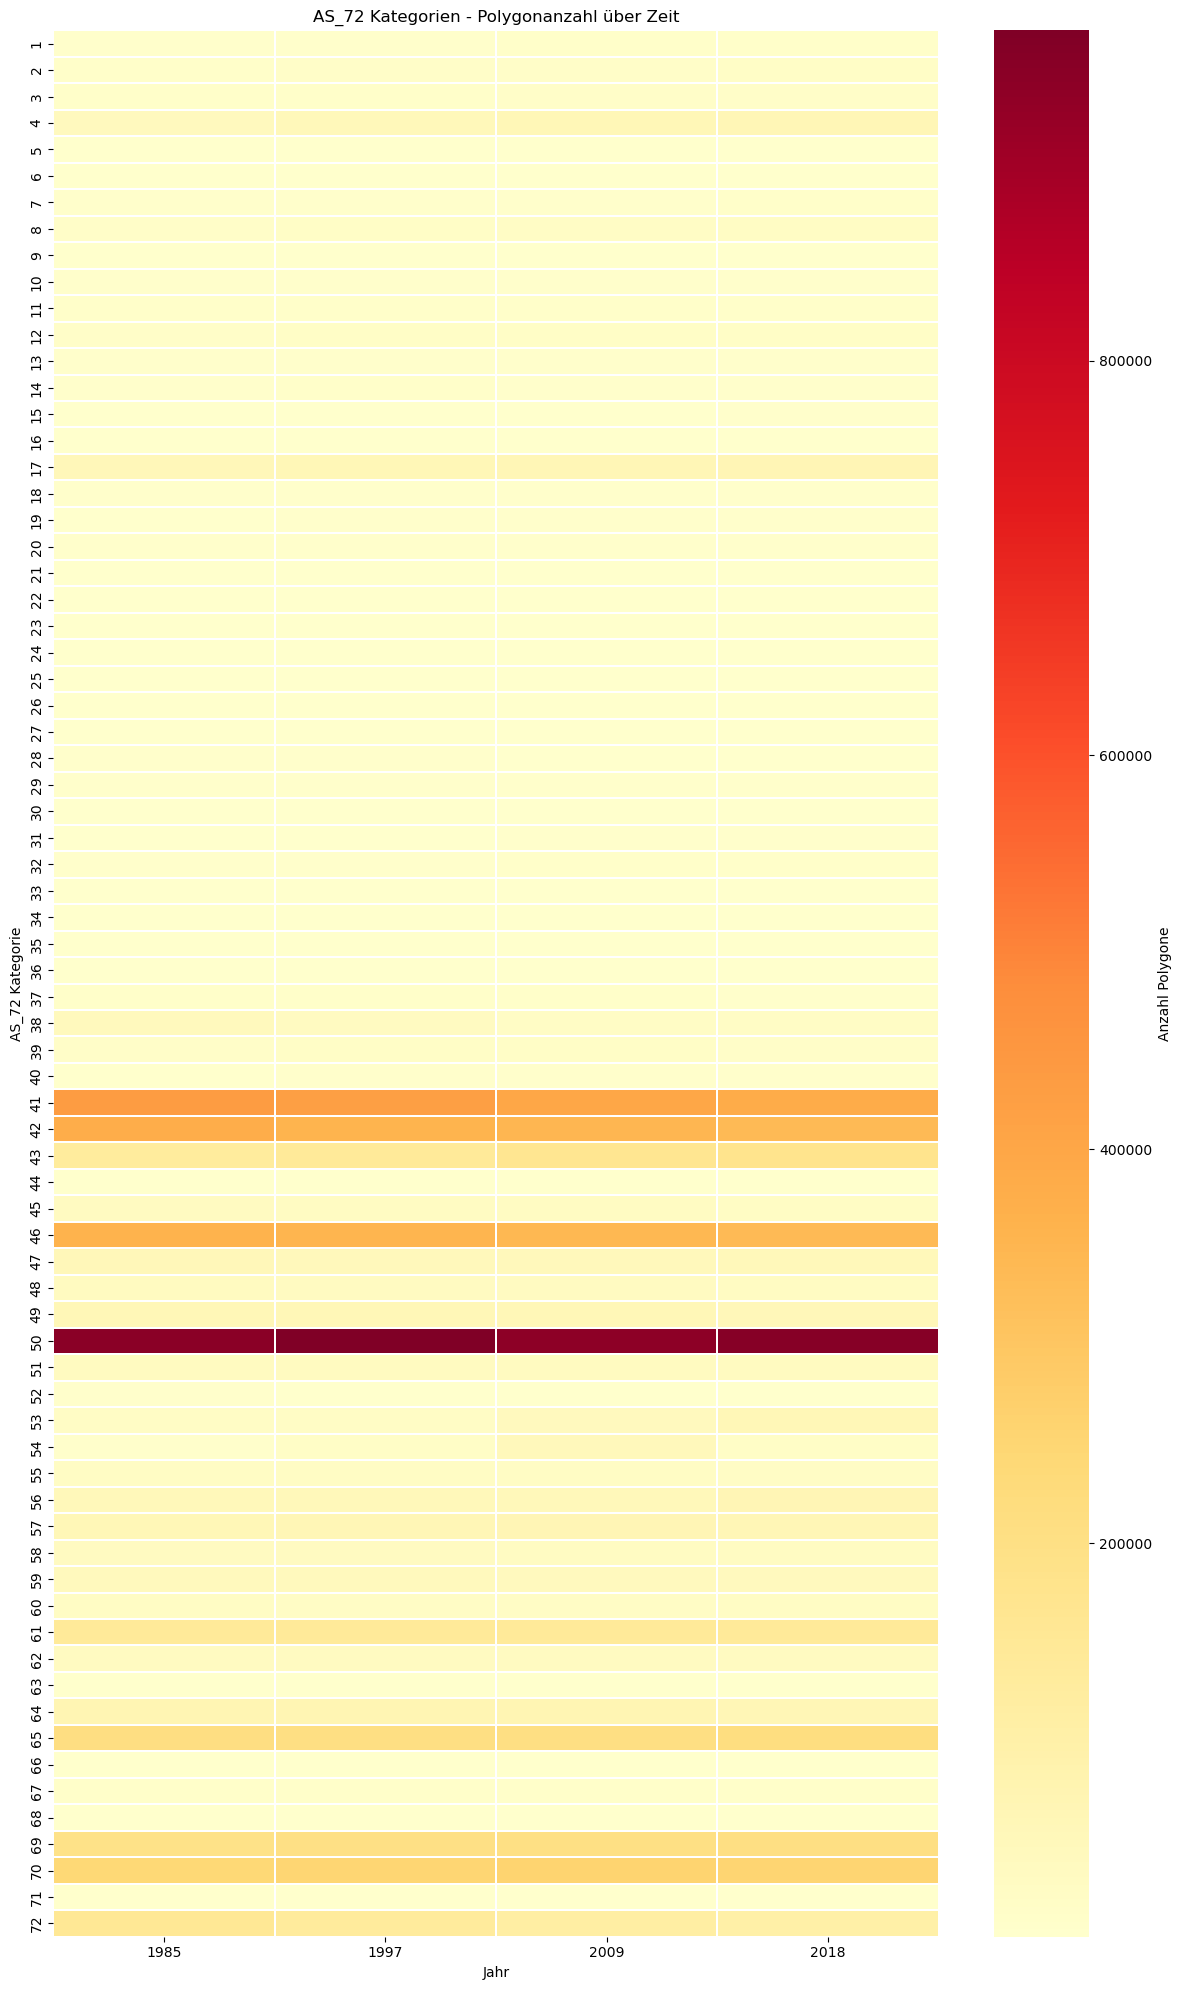

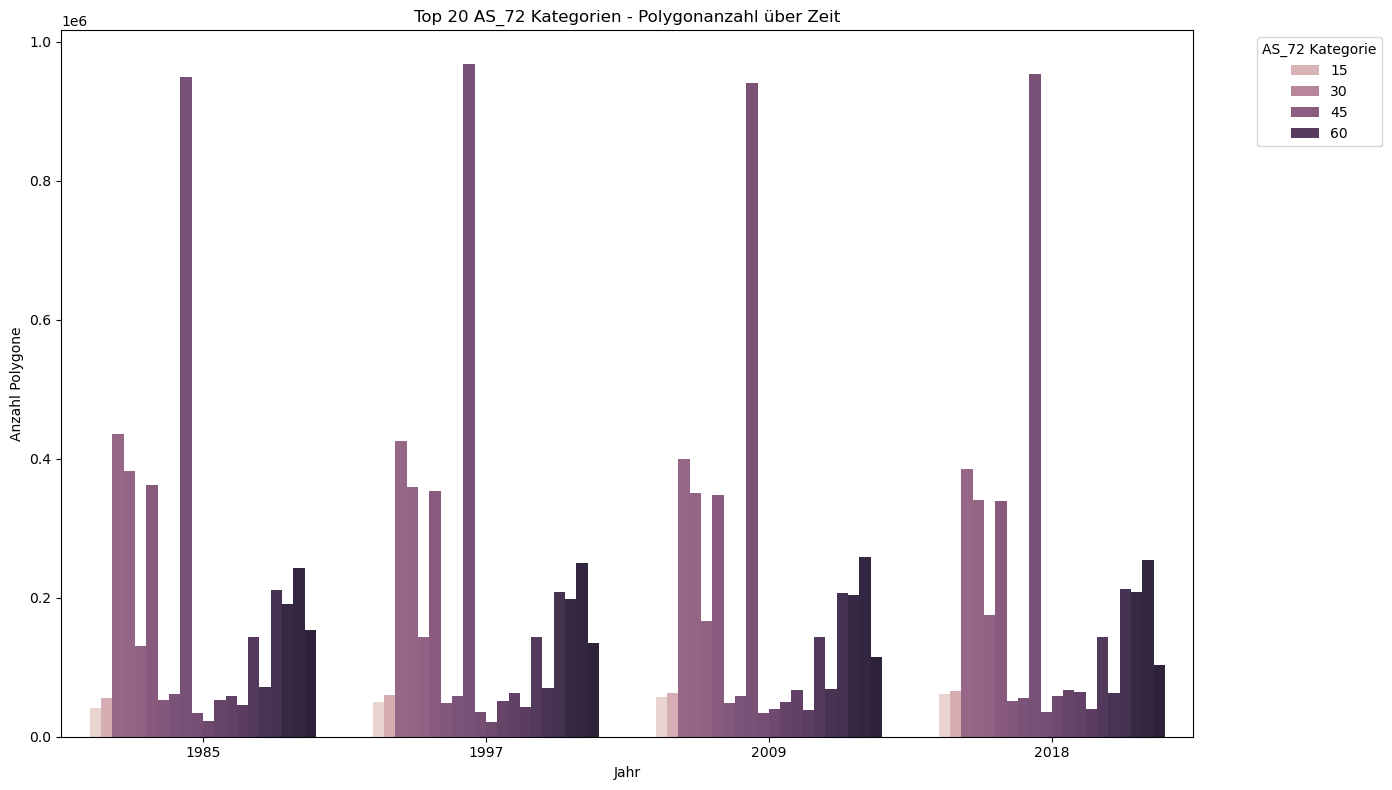

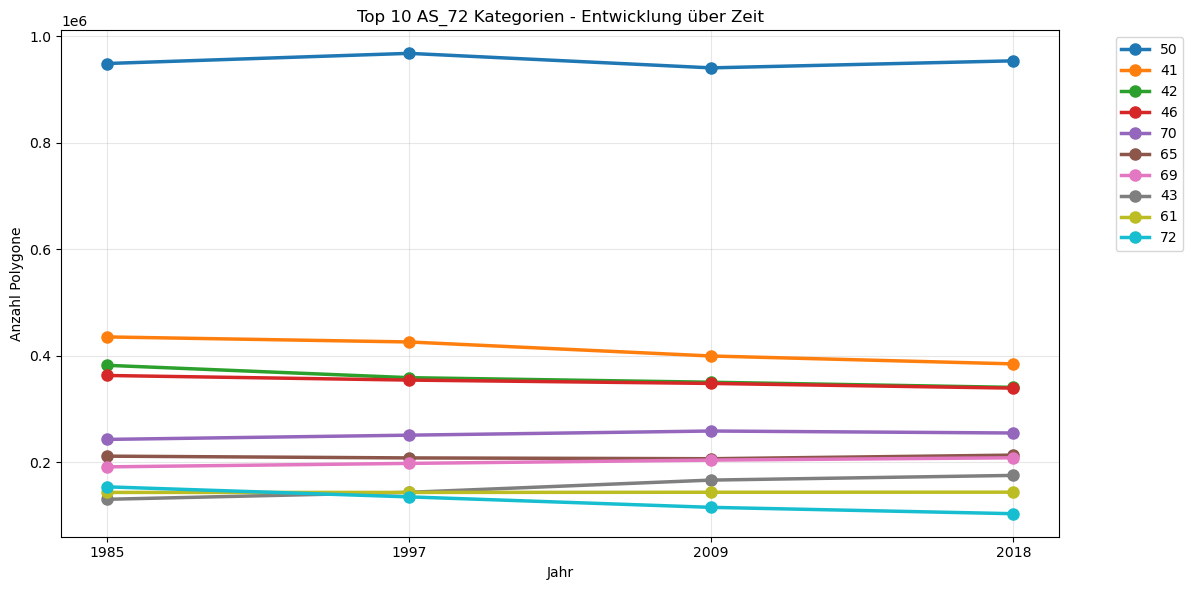

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

counts_pivot = pd.read_csv(
    r"D:\Worldcover_test\data\analysis\worldcover\arealstatistik_Zeitvergleich.csv",
    sep=';'
)

print("Shape:", counts_pivot.shape)
print("Columns:", counts_pivot.columns.tolist())
print(counts_pivot.head())

cat_col = counts_pivot.columns[0]
year_cols = counts_pivot.columns[1:].tolist()

# Convert year columns to numeric, coercing invalid parsing to NaN
for col in year_cols:
    counts_pivot[col] = pd.to_numeric(counts_pivot[col], errors='coerce')

# Check for empty or all-NaN columns
print("NaN counts per year column:")
print(counts_pivot[year_cols].isna().sum())

# Drop columns fully empty if any
counts_pivot = counts_pivot.dropna(axis=1, how='all')

# Update year_cols after drop
year_cols = [col for col in counts_pivot.columns if col != cat_col]

# Wide → Long umformen für Barplot
counts_melted = pd.melt(
    counts_pivot,
    id_vars=cat_col,          # Kategorien-Spalte (z.B. 'AS_72')
    value_vars=year_cols,     # Jahres-Spalten
    var_name="year",
    value_name="count"
)

# Now prepare heatmap data
heatmap_data = counts_pivot.set_index(cat_col)[year_cols]

print("Heatmap data shape:", heatmap_data.shape)
print(heatmap_data.head())

plt.figure(figsize=(12, 20))
sns.heatmap(
    heatmap_data,
    annot=False,
    cmap="YlOrRd",
    cbar_kws={'label': 'Anzahl Polygone'},
    linewidths=0.1
)
plt.title("AS_72 Kategorien - Polygonanzahl über Zeit")
plt.xlabel("Jahr")
plt.ylabel("AS_72 Kategorie")
plt.tight_layout()
plt.savefig(r"D:\Worldcover_test\data\analysis\worldcover\AS72_heatmap_full.png", dpi=300, bbox_inches='tight')
plt.show()

# 2) TOP 20 Kategorien nach Gesamtsumme über alle Jahre
top_n = 20
top_cats = counts_pivot[year_cols].sum(axis=1).nlargest(top_n).index.tolist()
top_labels = counts_pivot.loc[top_cats, cat_col].tolist()

top_data = counts_melted[counts_melted[cat_col].isin(top_labels)] \
    .sort_values(['year', 'count'], ascending=[True, False])

plt.figure(figsize=(14, 8))
sns.barplot(data=top_data, x="year", y="count", hue=cat_col)
plt.title(f"Top {top_n} AS_72 Kategorien - Polygonanzahl über Zeit")
plt.xlabel("Jahr")
plt.ylabel("Anzahl Polygone")
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="AS_72 Kategorie")
plt.tight_layout()
plt.savefig(r"D:\Worldcover_test\data\analysis\worldcover\AS72_top20_bars.png", dpi=300, bbox_inches='tight')
plt.show()

# 3) Line plot für dominante Kategorien (Top 10 durchschnittlich)
top_avg = counts_pivot[year_cols].mean(axis=1).nlargest(10)
top10_idx = top_avg.index.tolist()
top10_labels = counts_pivot.loc[top10_idx, cat_col].tolist()

plt.figure(figsize=(12, 6))
for label in top10_labels:
    row = counts_pivot[counts_pivot[cat_col] == label]
    if not row.empty:
        values = row[year_cols].iloc[0].values.astype(float)
        plt.plot(year_cols, values, marker='o', linewidth=2.5,
                 markersize=8, label=str(label))

plt.title("Top 10 AS_72 Kategorien - Entwicklung über Zeit")
plt.xlabel("Jahr")
plt.ylabel("Anzahl Polygone")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(r"D:\Worldcover_test\data\analysis\worldcover\AS72_top10_lines.png", dpi=300, bbox_inches='tight')
plt.show()


2

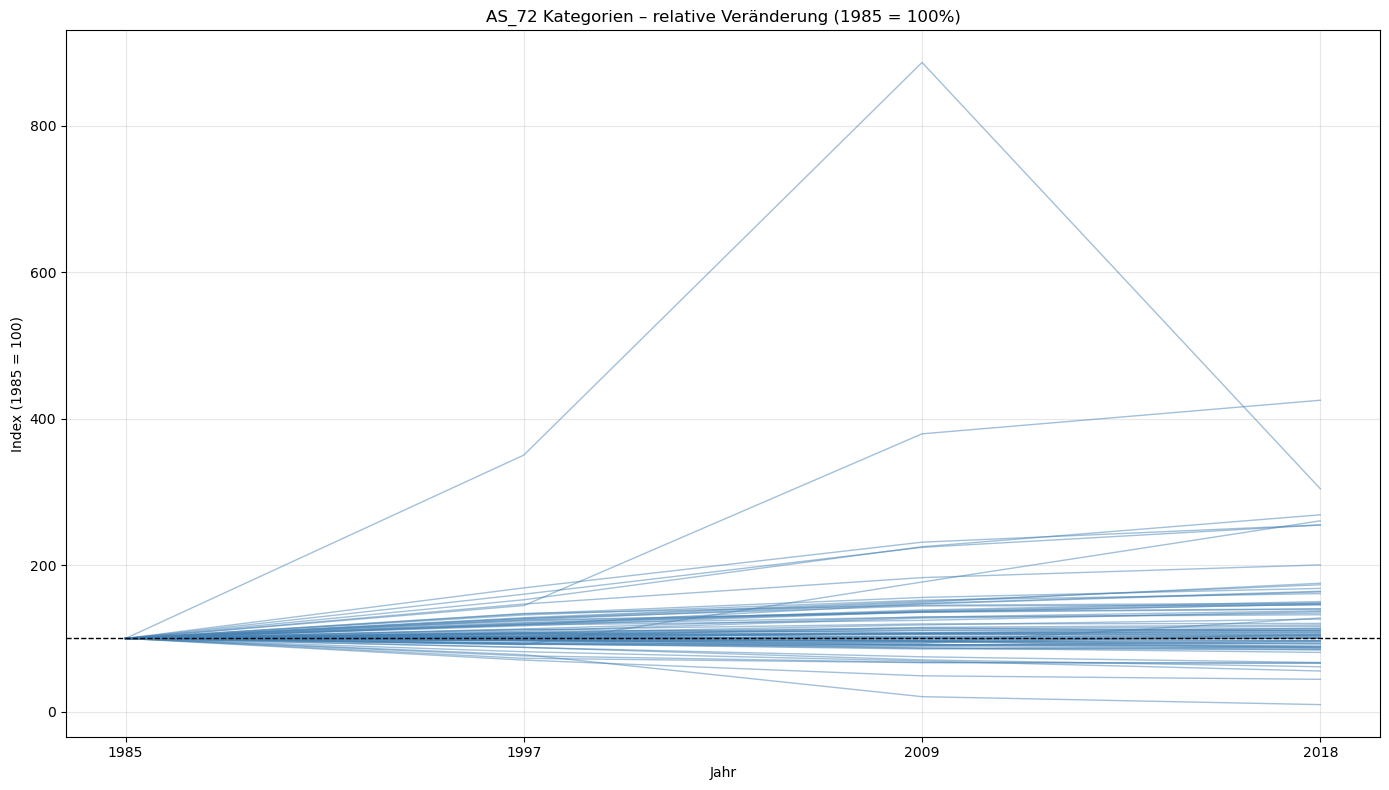

Relative Werte gespeichert als: D:\Worldcover_test\data\analysis\worldcover\AS72_relative_1985_equals_100.csv


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# counts_pivot already geladen wie vorher:
# cat_col = counts_pivot.columns[0]
# year_cols = counts_pivot.columns[1:].tolist()
# und year_cols sind numerisch konvertiert

# 1) Prozentänderung relativ zu 1985 (Basis = 100)
base_year = year_cols[0]          # sollte '1985' sein
rel_df = counts_pivot.copy()

for col in year_cols:
    rel_df[col] = (counts_pivot[col] / counts_pivot[base_year]) * 100

# Zeilen, bei denen Basisjahr = 0 oder NaN ist, entfernen (Division durch 0)
mask_valid = counts_pivot[base_year] > 0
rel_df = rel_df[mask_valid]

# 2) Liniendiagramm: alle Kategorien, keine Marker
plt.figure(figsize=(14, 8))

for _, row in rel_df.iterrows():
    values = row[year_cols].values.astype(float)
    plt.plot(year_cols, values, linewidth=1, alpha=0.5, color="steelblue")

plt.axhline(100, color="black", linewidth=1, linestyle="--")  # Basislinie 1985 = 100
plt.title("AS_72 Kategorien – relative Veränderung (1985 = 100%)")
plt.xlabel("Jahr")
plt.ylabel("Index (1985 = 100)")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(r"D:\Worldcover_test\data\analysis\worldcover\AS72_all_lines_rel_1985.png",
            dpi=300, bbox_inches='tight')
plt.show()

# rel_df enthält die Werte mit 1985 = 100 (siehe vorheriger Code)
# Basisjahr-Spalte heißt base_year, Kategorien-Spalte cat_col

# CSV mit Prozentänderungen speichern
out_path = r"D:\Worldcover_test\data\analysis\worldcover\AS72_relative_1985_equals_100.csv"
rel_df.to_csv(out_path, index=False)

print("Relative Werte gespeichert als:", out_path)
